In [2]:
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
kospi=yf.download('^ks11','2022-09-15','2023-09-15')['Close']

[*********************100%%**********************]  1 of 1 completed


In [3]:
x=kospi.index

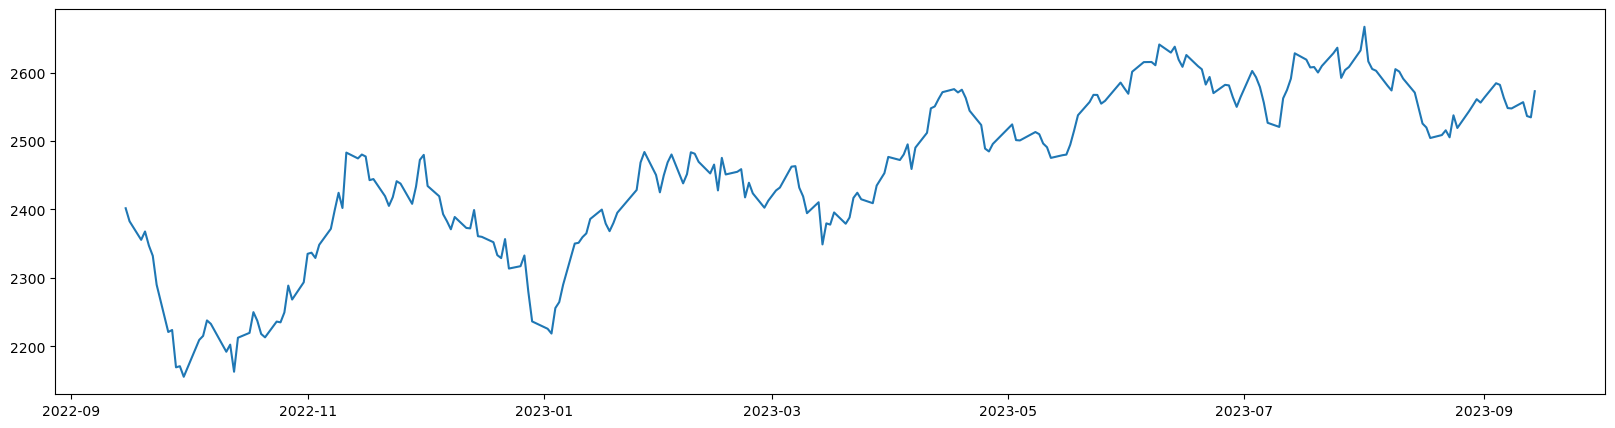

In [4]:
plt.figure(figsize=(20,5))
plt.plot(x,kospi)

In [5]:
def moving_average(D,m):
    L=[]
    n=len(D)
    for t in range(n-m):
        vt=np.mean(D[t:t+m])
        L.append(vt)
    x1=x[:n-m]
    plt.plot(x1,L)
    
def moving_average2(D,m):
    L=[]
    n=len(D)
    for t in range(n-m):
        vt=np.mean(D[t:t+m])
        L.append(vt)
    x=range(m,n)
    plt.plot(x,L)

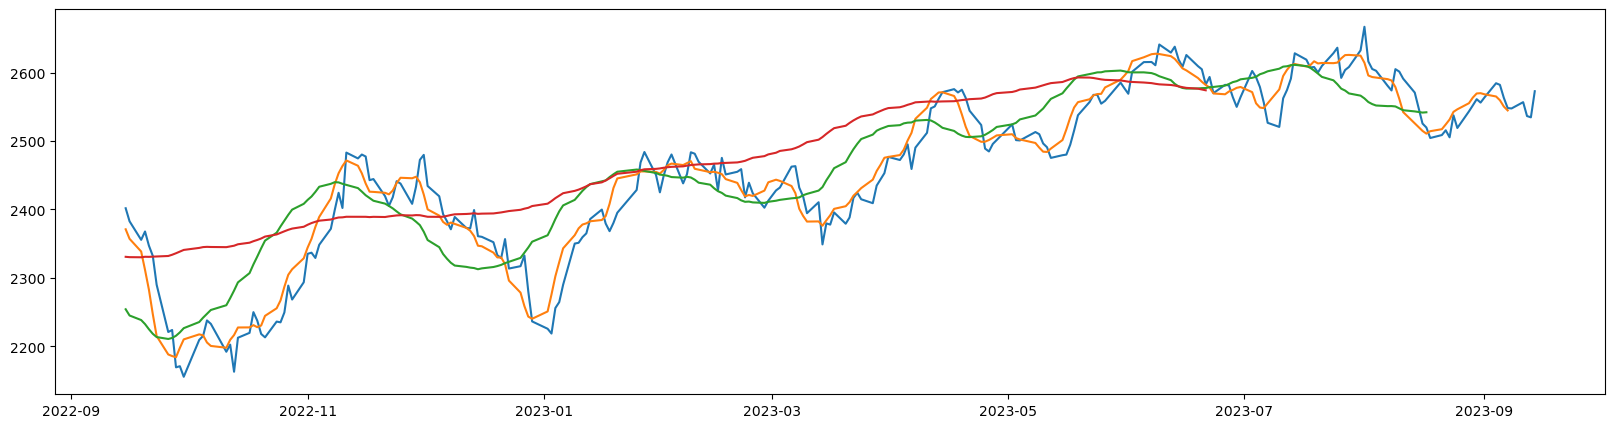

In [6]:
plt.figure(figsize=(20,5))
plt.plot(kospi)
moving_average(kospi,5)
moving_average(kospi,20)
moving_average(kospi,60)
plt.show()

In [7]:
def autoregression(n,p):
    L=[]
    x0,x1=0,0
    for t in range(n):
        xt=p*x0+np.random.normal(0,1)
        L.append(xt)
        x0=x1
        x1=xt
    return L

In [8]:
Xt=autoregression(100,-0.9)

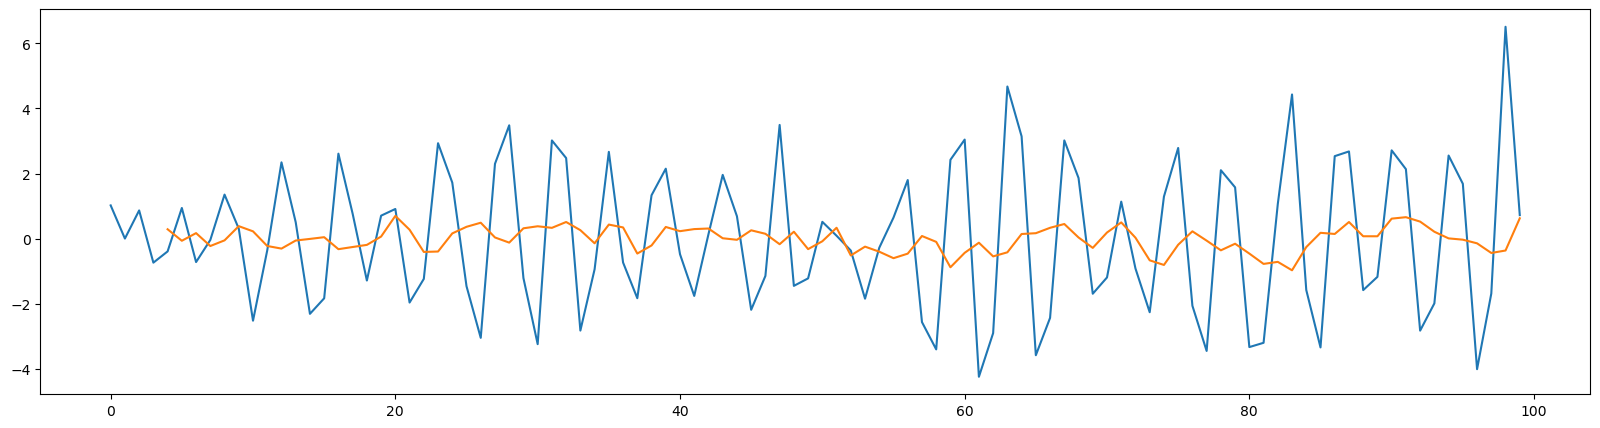

In [9]:
plt.figure(figsize=(20,5))
plt.plot(Xt)
moving_average2(Xt,4)
plt.show()

In [10]:
def cos(n):
    t=np.linspace(0,n,n+1)
    xt=np.cos(2*np.pi*t/4)
    return xt

In [11]:
cos_1=cos(100)

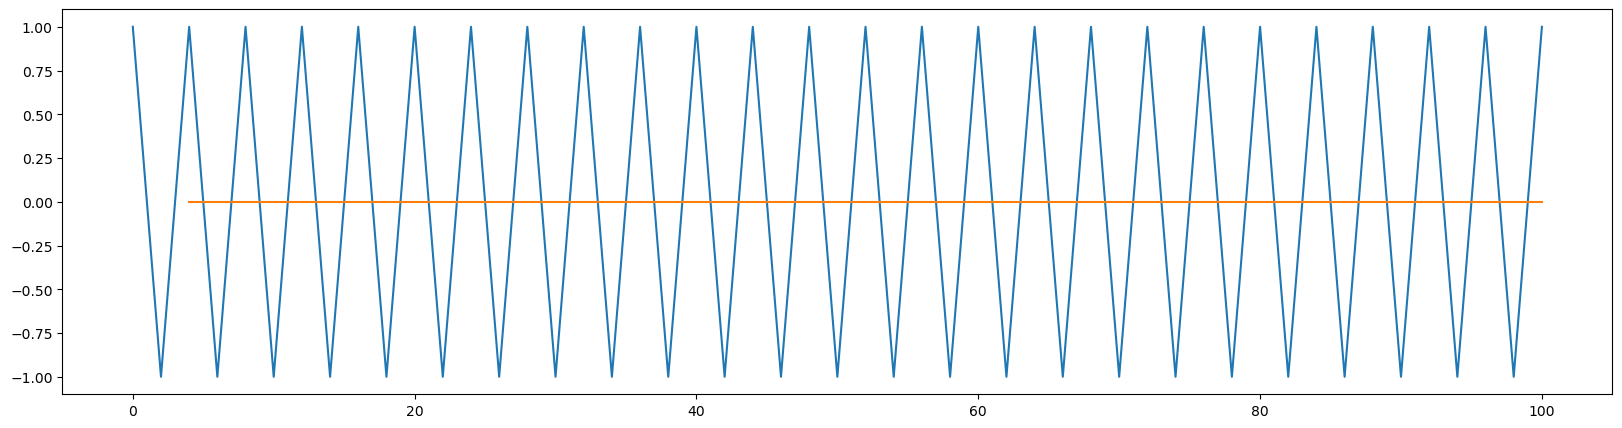

In [16]:
plt.figure(figsize=(20,5))
plt.plot(cos_1)
moving_average2(cos_1,4)

In [13]:
def cos2(n):
    L=[]
    for t in range(1,n+1):
        xt=np.cos(2*np.pi*t/4) + np.random.normal(0,1)
        L.append(xt)
    return L

In [14]:
cos_2=cos2(100)

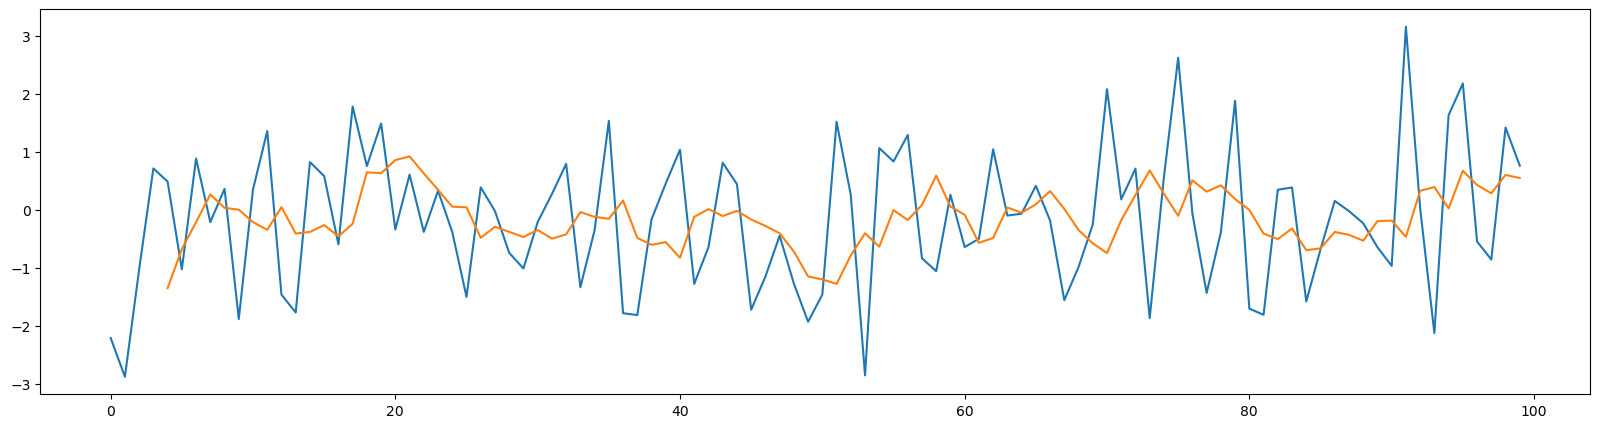

In [15]:
plt.figure(figsize=(20,5))
plt.plot(cos_2)
moving_average2(cos_2,4)

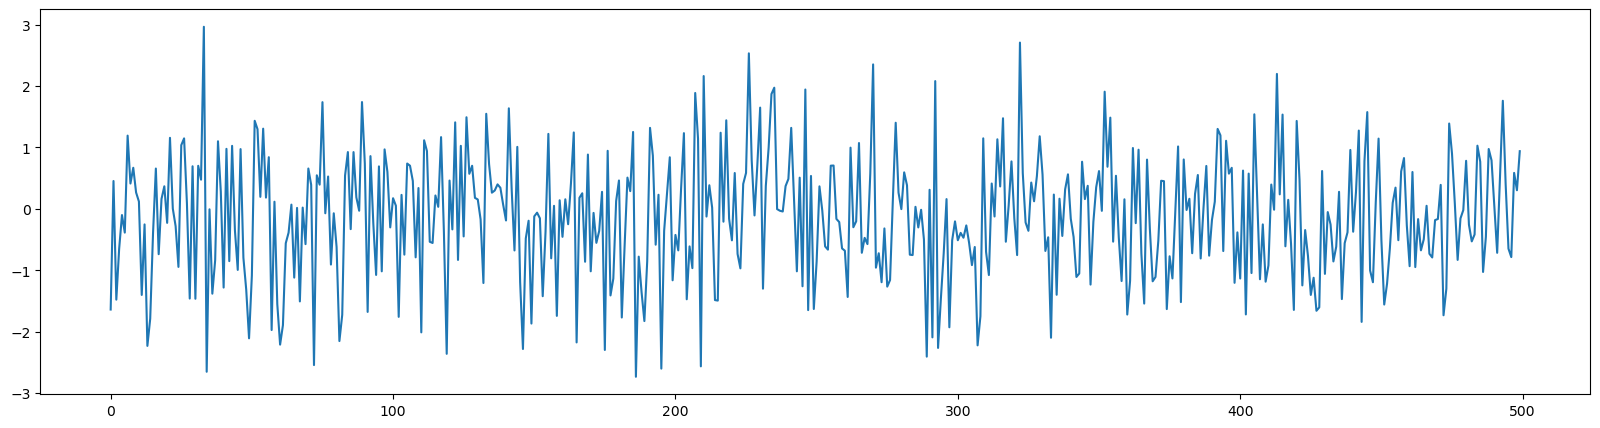

[1.004447013184695, -0.019795130241980857, 0.05007195306072315, -0.024499449121142478, 0.020846384572293677, 0.040916334087631116, 0.0005744476387633228, -0.05649737787087004, 0.062312072662461, 0.05375293517616776, 0.07168454953075717, 0.001100779789758622, -0.048209397257358136, 0.03966354116644192, 0.05845531846830651, -0.05040547672848039, -0.010692588729838744, -0.024000661793119923, -0.00988177996235332, 0.004779946082493309]
[ 1.00000000e+00 -1.97074908e-02  4.98502683e-02 -2.43909821e-02
  2.07540909e-02  4.07351842e-02  5.71904372e-04 -5.62472456e-02
  6.20361969e-02  5.35149535e-02  7.13671787e-02  1.09590628e-03
 -4.79959586e-02  3.94879378e-02  5.81965178e-02 -5.01823153e-02
 -1.06452492e-02 -2.38944031e-02 -9.83803011e-03  4.75878371e-03]


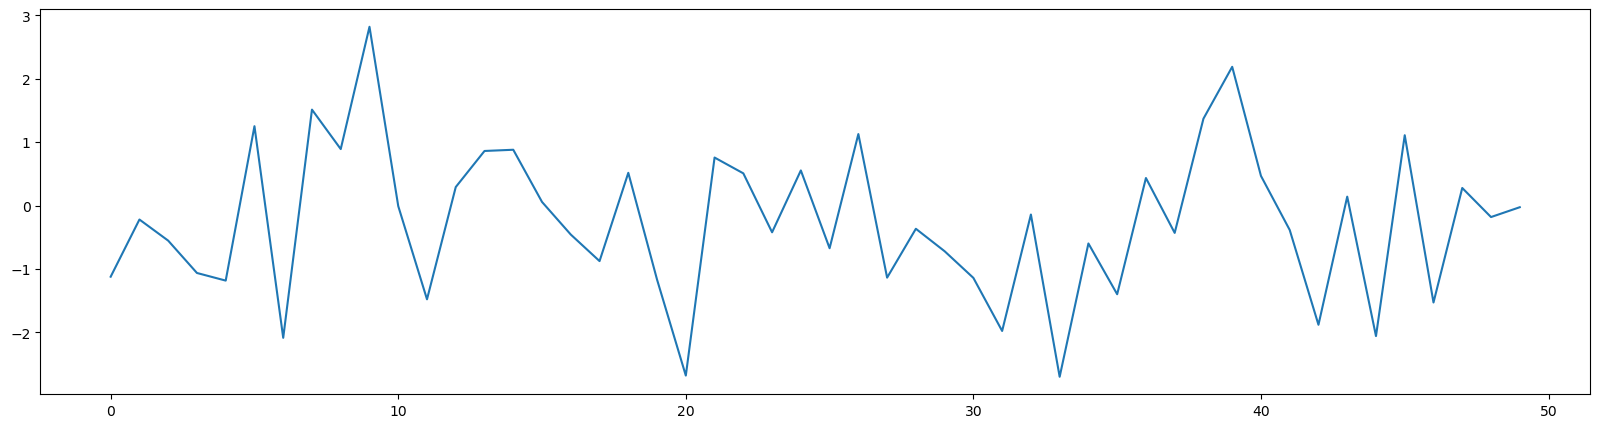

[1.4043532368844946, -0.01072619467220927, 0.3087432293549019, -0.1908391745128459, 0.09738863640279824, -0.19253283019153045, -0.21543335385995627, -0.2272166322951393, -0.0978866510307861, 0.010309821151217534, -0.13362337700429164, 0.041881588488957906, -0.13320758225599755, 0.2689997234534204, 0.14072781198474316, 0.027168627410011578, 0.004520820324574317, 0.21751977832660618, -0.25532178582396947, -0.05519787702132826]
[ 1.         -0.00763782  0.21984727 -0.13589115  0.06934768 -0.13709715
 -0.15340396 -0.1617945  -0.0697023   0.00734133 -0.09514941  0.02982269
 -0.09485333  0.19154705  0.10020827  0.01934601  0.00321915  0.15488965
 -0.18180738 -0.03930484]


In [14]:
def autocov(x):
    L=[]
    n=len(x)
    mu=np.mean(x)
    for h in range(0,20):
        Lh=[]
        for t in range(n-h):
            ac=(x[t+h]-mu)*(x[t]-mu)
            Lh.append(ac)
        autocov_h=sum(Lh)/n
        L.append(autocov_h)
    return L

def sacf(x):
    ac=np.array(autocov(x))
    sa=ac/ac[0]
    return sa

xt=np.random.normal(0,1,500)

plt.figure(figsize=(20,5))
plt.plot(xt)
plt.show()

print(autocov(xt))
print(sacf(xt))

xt1=np.random.normal(0,1,50)

plt.figure(figsize=(20,5))
plt.plot(xt1)
plt.show()

print(autocov(xt1))
print(sacf(xt1))

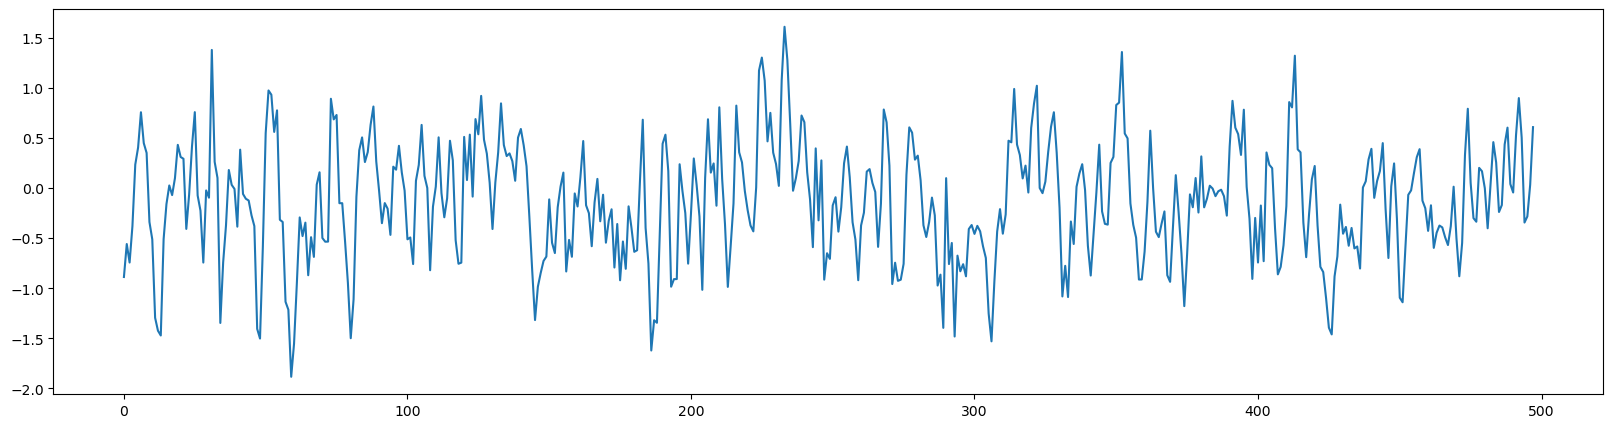

In [15]:
def moving_average(D):
    L=[]
    n=len(D)
    for t in range(1,n-1):
        vt=np.mean(D[t-1:t+2])
        L.append(vt)
    return L

maxt=moving_average(xt)

plt.figure(figsize=(20,5))
plt.plot(maxt)
plt.show()

In [16]:
print(autocov(maxt))
print(sacf(maxt))

[0.3370394218050997, 0.22182827143756081, 0.11953233671063067, 0.009213693678896486, 0.015849753867747448, 0.00891637514269918, 0.0051787777985808844, 0.00534872644671402, 0.028982013373209783, 0.04234190725918773, 0.03728746140775228, 0.014478651300615018, 0.006017761912959712, 0.008242264977900675, 0.008167019909006916, -0.006921333070689991, -0.01574608020941443, -0.01748650591215229, -0.0132662416516647, -0.020257478851656907]
[ 1.          0.65816714  0.35465387  0.02733714  0.04702641  0.02645499
  0.0153655   0.01586974  0.08598998  0.12562895  0.11063234  0.04295833
  0.01785477  0.0244549   0.02423165 -0.02053568 -0.04671881 -0.05188267
 -0.0393611  -0.06010418]


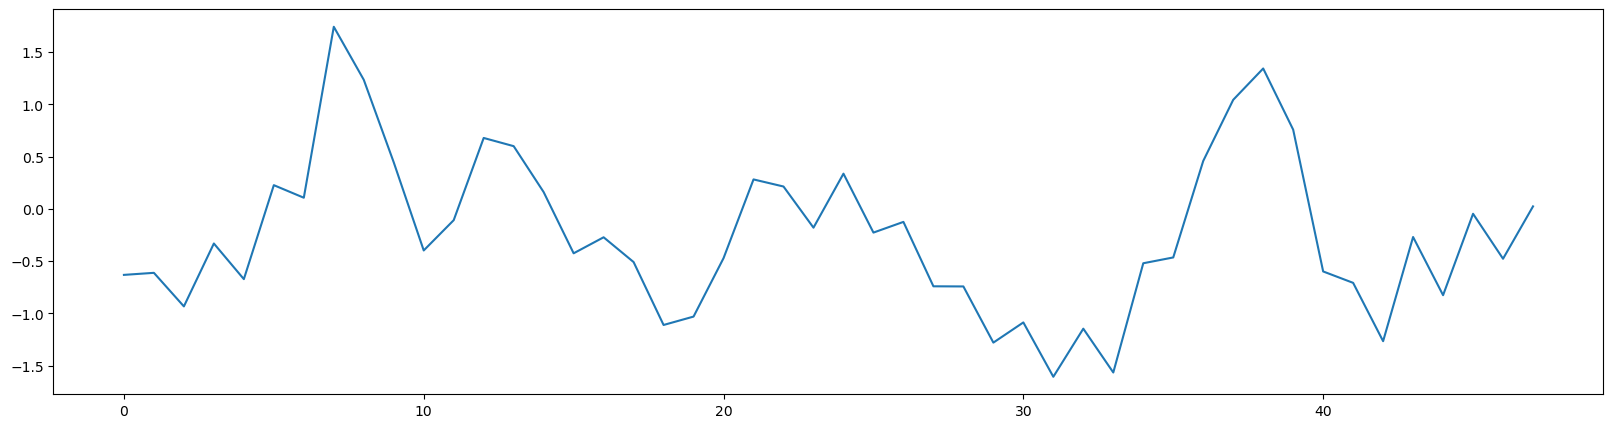

[0.5503629357177917, 0.36479514169292027, 0.22982363078047138, -0.002242400410542144, -0.048212422473722975, -0.14499795940376384, -0.17019851711945447, -0.16556227371771895, -0.10969656146399263, -0.05219107198392287, -0.05240386579640829, -0.0160084208658202, 0.023846782582402654, 0.10972407179864747, 0.11507550286563685, 0.11098600839443397, 0.0511060641254378, 0.017799412942114054, -0.08289829986306263, -0.13156338037813625]
[ 1.          0.66282651  0.41758559 -0.0040744  -0.08760114 -0.2634588
 -0.30924778 -0.30082381 -0.19931677 -0.09483028 -0.09521692 -0.02908703
  0.04332919  0.19936675  0.20909021  0.20165967  0.09285884  0.03234123
 -0.15062479 -0.2390484 ]


In [21]:
maxt1=moving_average(xt1)

plt.figure(figsize=(20,5))
plt.plot(maxt1)
plt.show()

print(autocov(maxt1))
print(sacf(maxt1))